## Image Details

These five classes of objects are airplane, ship, storage tank, baseball diamond, tennis court.
This dataset contains totally 800 VHR remote sensing images, where the folder "negative image set" includes 150 images that do not contain any targets of the given object classes and the folder "positive image set" includes 650 images with each image containing at least one target to be detected.

These images were cropped from Google Earth and Vaihingen data set and then manually annotated by experts. The Vaihingen data was provided by the German Society for Photogrammetry, Remote Sensing and Geoinformation (DGPF): http://www.ifp.uni-stuttgart.de/dgpf/DKEPAllg.html.

The folder "ground truth" contains 650 separate text files and each one corresponds to an image in "positive image set" folder. Each line of those text files defines a ground truth bounding box in the following format: 
(x1,y1),(x2,y2),a
where (x1,y1) denotes the top-left coordinate of the bounding box, (x2,y2) denotes the right-bottom coordinate of the bounding box, and a is the object class 
(1-airplane, 
2-ship, 
3-storage tank, 
4-baseball diamond, 
5-tennis court)

## Importing the basic libraries for image processing and handling

In [132]:
import cv2 
import cv2 as cv
import numpy as np
import pandas as pd
import keras_preprocessing
from keras_preprocessing import image
import matplotlib.pyplot as plt
import os
from pathlib import Path
from scipy import ndimage
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import re

In [133]:
## For creating a beep sound once processing is complete
## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
  display(Audio(url='http://www.soundjay.com/button/beep-07.wav', autoplay=True))

# For reading coordinates files and appending them into a list

In [134]:
pathtxt = os.path.join(r"C:\Users\Lenovo\Object Detection", "ground truth")
txt_list = []
for i in os.listdir(pathtxt):
    txtfile_full_path = os.path.join(pathtxt, i)
    with open(txtfile_full_path) as f:
            txt_list.append(f.read())

In [135]:
txt_list[1].split(" \n")

['(575,114),(635,162),1',
 '( 72,305),(133,369),1',
 '(210,317),(273,384),1',
 '(306,374),(344,420),1',
 '(447,531),(535,632),1',
 '(546,605),(625,707),1',
 '(632,680),(720,790),1',
 '']

# Reading the files and masking and saving them into a directory

## Reading the images from the respective folders, using regex to extract coordinates of the masks, creating masks on the images and saving them to a folder
### The process of masking can help with accurate training of the model since it reduces the unnecessary elements in an image and focuses on the particular item under consideration

In [4]:
DATADIR = "C:\\Users\\Lenovo\\Object Detection\\"
pathp = os.path.join(DATADIR, 'All')

### Image Category 1

In [169]:
count = 0 
image_type_1 = []
for img in os.listdir(pathp):
    a = cv2.imread(os.path.join(pathp,img))
    height,width,depth = a.shape
    u = txt_list[count].split(" \n")
    list_co = []
    p = re.compile('\d+')
    for i in range(len(u)):
        if p.findall(u[i]) != []:
            list_co.append(p.findall(u[i]))
            if list_co[i][4] == '1':
                rect_img = np.zeros((height,width), np.uint8)
                for i in range(len(list_co)):
                    if list_co[i][4] == "1":
                        cv.rectangle(img = rect_img, pt1 = (int(list_co[i][0]),int(list_co[i][1])), pt2 = (int(list_co[i][2]),int(list_co[i][3])), color = (255, 255, 255), thickness = -1)
                masked_data = cv.bitwise_and(a, a, mask=rect_img)
                dim = (256,256)
                resized = cv2.resize(masked_data, dim, interpolation = cv2.INTER_AREA)
                cv2.imwrite(os.path.join("C:\\Users\\Lenovo\\Object Detection\\1", "img_masked_1_{}.jpg".format(count)), resized)
                image_type_1.append(resized)
    count+=1

### Image Category 2

In [171]:
count = 0 
image_type_2 = []
for img in os.listdir(pathp):
    a = cv2.imread(os.path.join(pathp,img))
    height,width,depth = a.shape
    u = txt_list[count].split(" \n")
    list_co = []
    p = re.compile('\d+')
    for i in range(len(u)):
        if p.findall(u[i]) != []:
            list_co.append(p.findall(u[i]))
            if list_co[i][4] == '2':
                rect_img = np.zeros((height,width), np.uint8)
                for i in range(len(list_co)):
                    if list_co[i][4] == "2":
                        cv.rectangle(img = rect_img, pt1 = (int(list_co[i][0]),int(list_co[i][1])), pt2 = (int(list_co[i][2]),int(list_co[i][3])), color = (255, 255, 255), thickness = -1)
                masked_data = cv.bitwise_and(a, a, mask=rect_img)
                dim = (256,256)
                resized = cv2.resize(masked_data, dim, interpolation = cv2.INTER_AREA)
                cv2.imwrite(os.path.join("C:\\Users\\Lenovo\\Object Detection\\2", "img_masked_2_{}.jpg".format(count)), resized)
                image_type_2.append(resized)
    count+=1

### Image Category 3

In [160]:
count = 0 
image_type_3 = []
for img in os.listdir(pathp):
    a = cv2.imread(os.path.join(pathp,img))
    height,width,depth = a.shape
    u = txt_list[count].split(" \n")
    list_co = []
    p = re.compile('\d+')
    for i in range(len(u)):
        if p.findall(u[i]) != []:
            list_co.append(p.findall(u[i]))
            if list_co[i][4] == '3':
                rect_img = np.zeros((height,width), np.uint8)
                for i in range(len(list_co)):
                    if list_co[i][4] == "3":
                        cv.rectangle(img = rect_img, pt1 = (int(list_co[i][0]),int(list_co[i][1])), pt2 = (int(list_co[i][2]),int(list_co[i][3])), color = (255, 255, 255), thickness = -1)
                masked_data = cv.bitwise_and(a, a, mask=rect_img)
                dim = (256,256)
                resized = cv2.resize(masked_data, dim, interpolation = cv2.INTER_AREA)
                cv2.imwrite(os.path.join("C:\\Users\\Lenovo\\Object Detection\\3", "img_masked_3_{}.jpg".format(count)), resized)
                image_type_3.append(resized)
    count+=1

### Image Category 4

In [161]:
count = 0 
image_type_4 = []
for img in os.listdir(pathp):
    a = cv2.imread(os.path.join(pathp,img))
    height,width,depth = a.shape
    u = txt_list[count].split(" \n")
    list_co = []
    p = re.compile('\d+')
    for i in range(len(u)):
        if p.findall(u[i]) != []:
            list_co.append(p.findall(u[i]))
            if list_co[i][4] == '4':
                rect_img = np.zeros((height,width), np.uint8)
                for i in range(len(list_co)):
                    if list_co[i][4] == "4":
                        cv.rectangle(img = rect_img, pt1 = (int(list_co[i][0]),int(list_co[i][1])), pt2 = (int(list_co[i][2]),int(list_co[i][3])), color = (255, 255, 255), thickness = -1)
                masked_data = cv.bitwise_and(a, a, mask=rect_img)
                dim = (256,256)
                resized = cv2.resize(masked_data, dim, interpolation = cv2.INTER_AREA)
                cv2.imwrite(os.path.join("C:\\Users\\Lenovo\\Object Detection\\4", "img_masked_4_{}.jpg".format(count)), resized)
                image_type_4.append(resized)
    count+=1

### Image Category 5

In [162]:
count = 0 
image_type_5 = []
for img in os.listdir(pathp):
    a = cv2.imread(os.path.join(pathp,img))
    height,width,depth = a.shape
    u = txt_list[count].split(" \n")
    list_co = []
    p = re.compile('\d+')
    for i in range(len(u)):
        if p.findall(u[i]) != []:
            list_co.append(p.findall(u[i]))
            if list_co[i][4] == '5':
                rect_img = np.zeros((height,width), np.uint8)
                for i in range(len(list_co)):
                    if list_co[i][4] == "5":
                        cv.rectangle(img = rect_img, pt1 = (int(list_co[i][0]),int(list_co[i][1])), pt2 = (int(list_co[i][2]),int(list_co[i][3])), color = (255, 255, 255), thickness = -1)
                masked_data = cv.bitwise_and(a, a, mask=rect_img)
                dim = (256,256)
                resized = cv2.resize(masked_data, dim, interpolation = cv2.INTER_AREA)
                cv2.imwrite(os.path.join("C:\\Users\\Lenovo\\Object Detection\\5", "img_masked_5_{}.jpg".format(count)), resized)
                image_type_5.append(resized)
    count+=1

## Reading the saved images from the directory

In [144]:
h1 = os.path.join("C:\\Users\\Lenovo\\Object Detection\\", '1')
masked_images_1 = []
for i in os.listdir(h1):
    a = cv2.imread(os.path.join(h1,i))
    masked_images_1.append(a)
print("Number of images of category 1 =", len(masked_images_1))

Number of images of category 1 - 30


In [146]:
h2 = os.path.join("C:\\Users\\Lenovo\\Object Detection\\", '2')
masked_images_2 = []
for i in os.listdir(h2):
    a = cv2.imread(os.path.join(h2,i))
    masked_images_2.append(a)
print("Number of images of category 2 =", len(masked_images_2))

Number of images of category 2 = 30


In [147]:
h3 = os.path.join("C:\\Users\\Lenovo\\Object Detection\\", '3')
masked_images_3 = []
for i in os.listdir(h3):
    a = cv2.imread(os.path.join(h3,i))
    masked_images_3.append(a)
print("Number of images of category 3 =", len(masked_images_3))

Number of images of category 3 = 28


In [148]:
h4 = os.path.join("C:\\Users\\Lenovo\\Object Detection\\", '4')
masked_images_4 = []
for i in os.listdir(h4):
    a = cv2.imread(os.path.join(h4,i))
    masked_images_4.append(a)
print("Number of images of category 4 =", len(masked_images_4))

Number of images of category 4 = 30


In [149]:
h5 = os.path.join("C:\\Users\\Lenovo\\Object Detection\\", '5')
masked_images_5 = []
for i in os.listdir(h5):
    a = cv2.imread(os.path.join(h5,i))
    masked_images_5.append(a)
print("Number of images of category 5 =", len(masked_images_5))

Number of images of category 5 = 30


## Image Augmentation
### It is done to increase the number of images to be trained by the model and hence increase the accuracy of the model without obtaining new images.


In [159]:
gen = image.ImageDataGenerator(rotation_range=10, 
                               brightness_range=[0.8,1.0],
                               zoom_range=0.2,
                               horizontal_flip=True, 
                               vertical_flip=True,
                                width_shift_range=0.2, 
                               height_shift_range=0.2)

In [213]:
final_list = []

### Category 1: Airplanes

In [214]:
aug_images_1 = []
for i in masked_images_1:
    a = np.expand_dims(i,0)
    aug_iter = gen.flow(a)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]
    for i in aug_images:
        aug_images_1.append(i)
print("The number of images for category 1 is", len(aug_images_1))

The number of images for category 1 is 150


In [215]:
new_list_1 = []
for i in aug_images_1:
    i = i/255
    new_list_1.append([i,0])
    final_list.append([i,0])
print('The number of augmented images with airplanes:', len(new_list_1))
allDone()

The number of augmented images with airplanes: 150


## Below are some of the samples of the augmented images of the first category

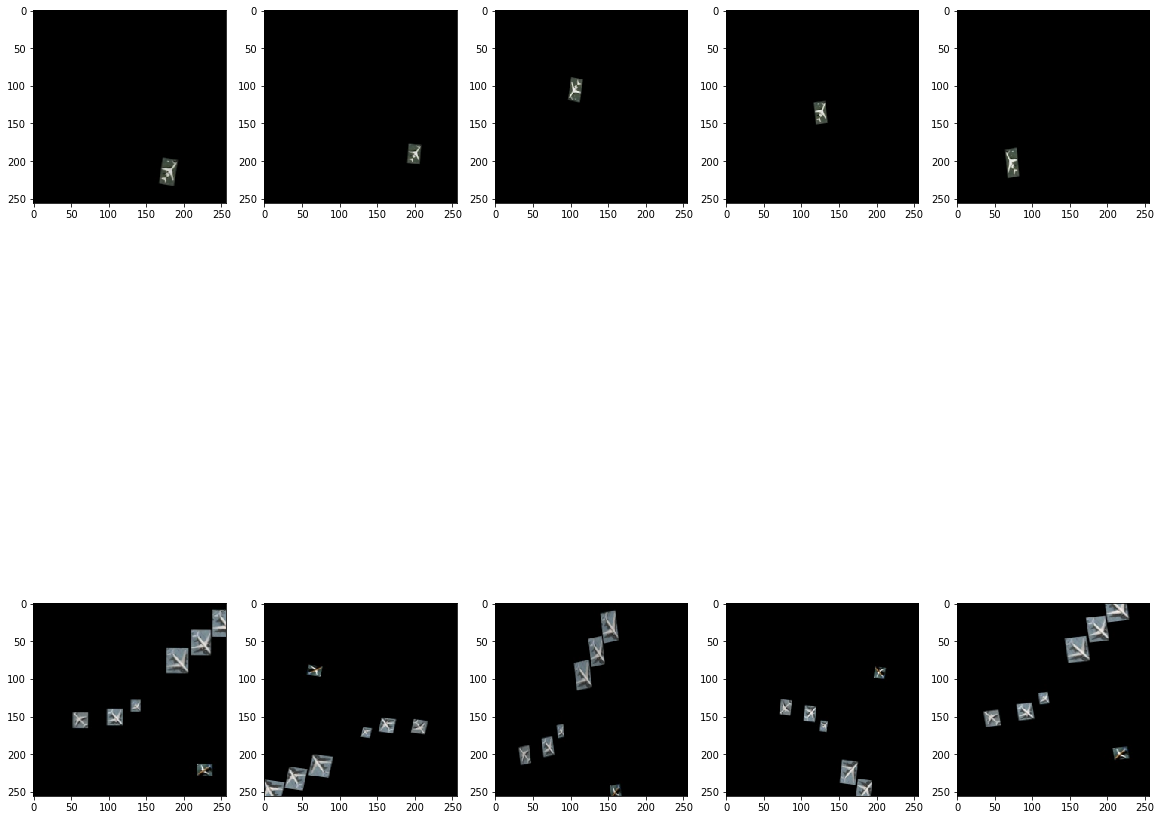

In [163]:
f, axarr = plt.subplots(2,5, figsize=(20,20))
axarr[0,0].imshow(aug_images_1[0])
axarr[0,1].imshow(aug_images_1[1])
axarr[0,2].imshow(aug_images_1[2])
axarr[0,3].imshow(aug_images_1[3])
axarr[0,4].imshow(aug_images_1[4])
axarr[1,0].imshow(aug_images_1[5])
axarr[1,1].imshow(aug_images_1[6])
axarr[1,2].imshow(aug_images_1[7])
axarr[1,3].imshow(aug_images_1[8])
axarr[1,4].imshow(aug_images_1[9])

## Category 2 : Ships

In [216]:
aug_images_2 = []
for i in masked_images_2:
    a = np.expand_dims(i,0)
    aug_iter = gen.flow(a)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]
    for i in aug_images:
        aug_images_2.append(i)
len(aug_images_2)

150

In [217]:
new_list_2 = []
for i in aug_images_2:
    i = i/255
    new_list_2.append([i,1])
    final_list.append([i,1])
print('The number of augmented images with ships:', len(new_list_2))
allDone()

The number of augmented images with ships: 150


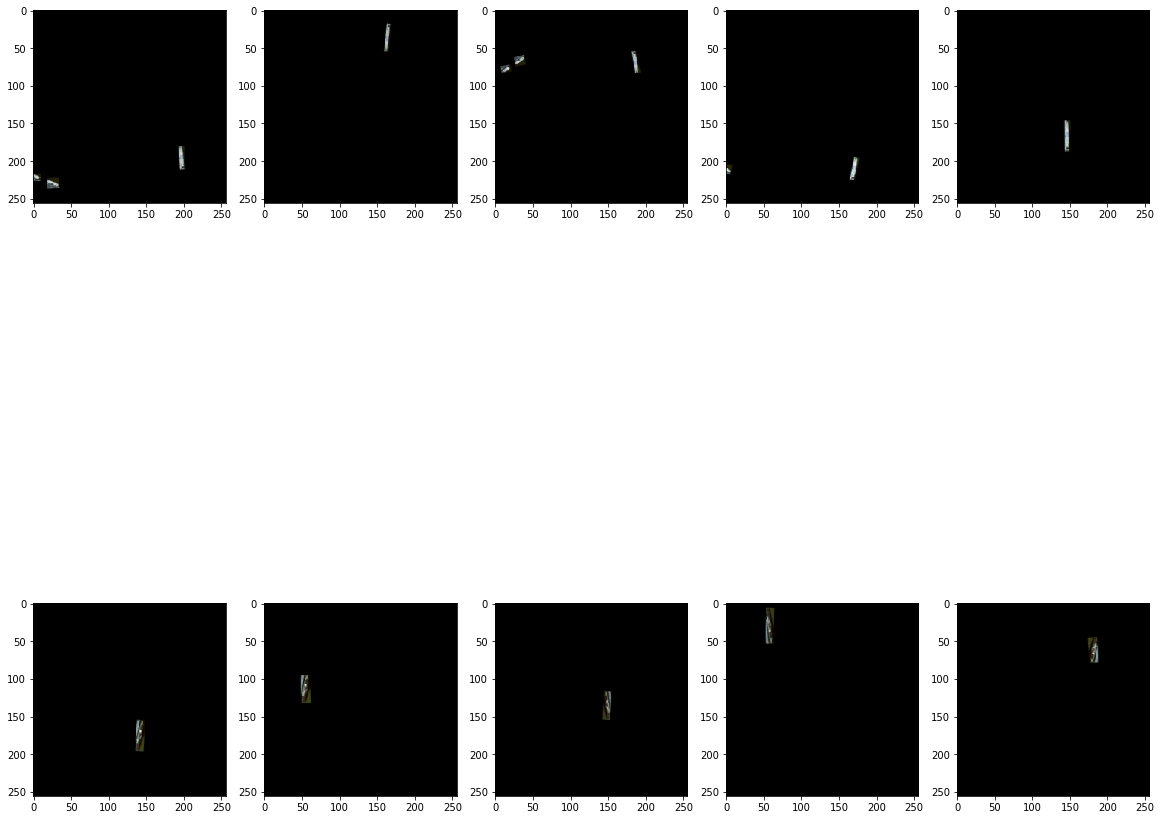

In [166]:
f, axarr = plt.subplots(2,5, figsize=(20,20))
axarr[0,0].imshow(aug_images_2[0])
axarr[0,1].imshow(aug_images_2[1])
axarr[0,2].imshow(aug_images_2[2])
axarr[0,3].imshow(aug_images_2[3])
axarr[0,4].imshow(aug_images_2[4])
axarr[1,0].imshow(aug_images_2[5])
axarr[1,1].imshow(aug_images_2[6])
axarr[1,2].imshow(aug_images_2[7])
axarr[1,3].imshow(aug_images_2[8])
axarr[1,4].imshow(aug_images_2[9])

## Category 3 : Storage Tank

In [218]:
aug_images_3 = []
for i in masked_images_3:
    a = np.expand_dims(i,0)
    aug_iter = gen.flow(a)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]
    for i in aug_images:
        aug_images_3.append(i)
len(aug_images_3)

140

In [219]:
new_list_3 = []
for i in aug_images_3:
    i = i/255
    new_list_3.append([i,2])
    final_list.append([i,2])
print('The number of augmented images with storage tanks:', len(new_list_3))
allDone()

The number of augmented images with storage tanks: 140


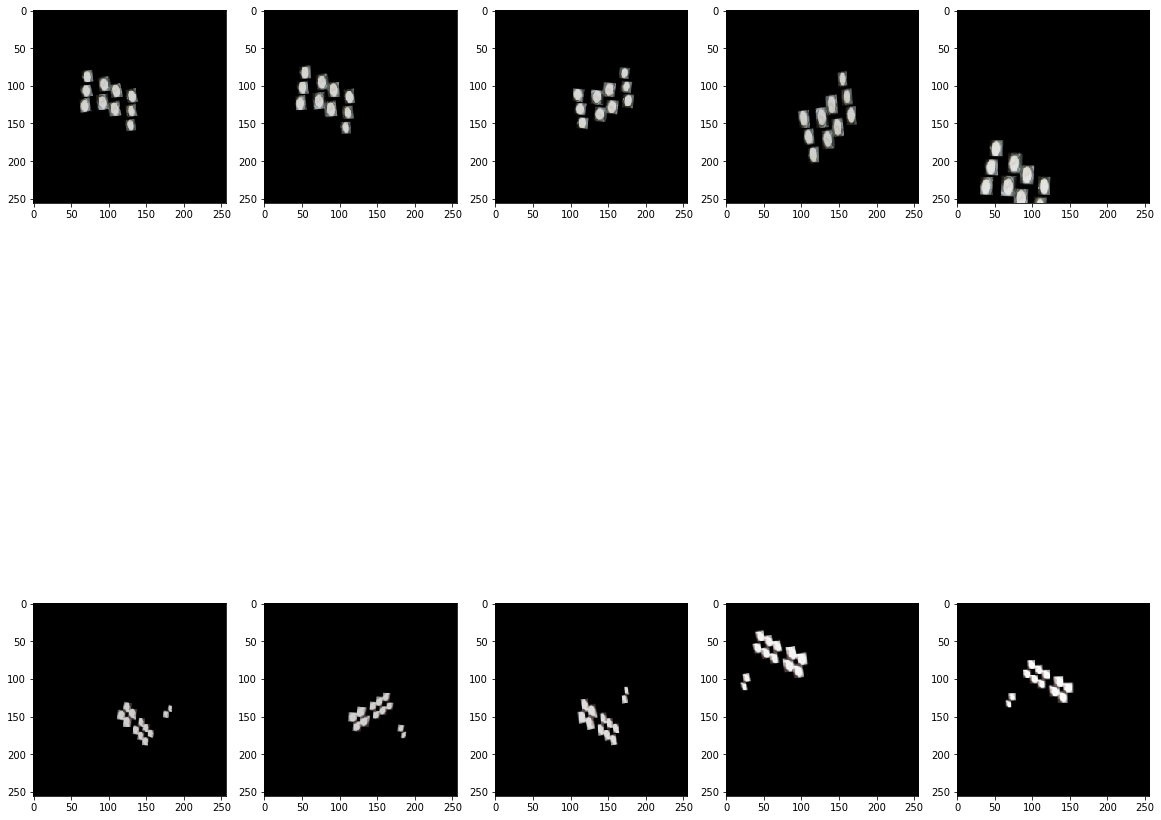

In [169]:
f, axarr = plt.subplots(2,5, figsize=(20,20))
axarr[0,0].imshow(aug_images_3[0])
axarr[0,1].imshow(aug_images_3[1])
axarr[0,2].imshow(aug_images_3[2])
axarr[0,3].imshow(aug_images_3[3])
axarr[0,4].imshow(aug_images_3[4])
axarr[1,0].imshow(aug_images_3[5])
axarr[1,1].imshow(aug_images_3[6])
axarr[1,2].imshow(aug_images_3[7])
axarr[1,3].imshow(aug_images_3[8])
axarr[1,4].imshow(aug_images_3[9])

## Category 4 : Baseball Field

In [170]:
aug_images_4 = []
for i in masked_images_4:
    a = np.expand_dims(i,0)
    aug_iter = gen.flow(a)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]
    for i in aug_images:
        aug_images_4.append(i)
len(aug_images_4)

150

In [171]:
new_list_4 = []
for i in aug_images_4:
    i = i/255
    new_list_4.append([i,3])
    final_list.append([i,3])
print('The number of augmented images with Baseball fields:', len(new_list_4))
allDone()

The number of augmented images with Baseball fields: 150


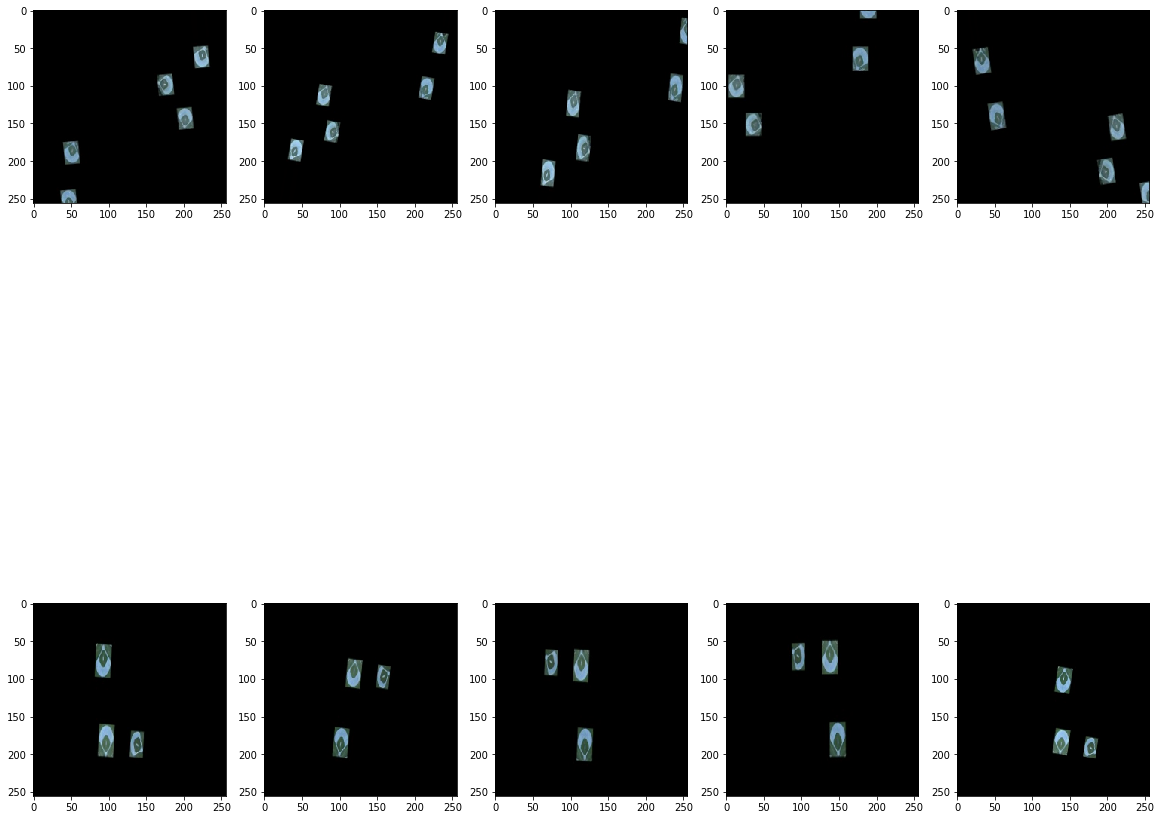

In [172]:
f, axarr = plt.subplots(2,5, figsize=(20,20))
axarr[0,0].imshow(aug_images_4[0])
axarr[0,1].imshow(aug_images_4[1])
axarr[0,2].imshow(aug_images_4[2])
axarr[0,3].imshow(aug_images_4[3])
axarr[0,4].imshow(aug_images_4[4])
axarr[1,0].imshow(aug_images_4[5])
axarr[1,1].imshow(aug_images_4[6])
axarr[1,2].imshow(aug_images_4[7])
axarr[1,3].imshow(aug_images_4[8])
axarr[1,4].imshow(aug_images_4[9])

## Category 5 :Tennis Court

In [173]:
aug_images_5 = []
for i in masked_images_5:
    a = np.expand_dims(i,0)
    aug_iter = gen.flow(a)
    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(5)]
    for i in aug_images:
        aug_images_5.append(i)
len(aug_images_5)

150

In [174]:
new_list_5 = []
for i in aug_images_5:
    i = i/255
    new_list_5.append([i,4])
    final_list.append([i,4])
print('The number of augmented images with tennis courts:', len(new_list_5))
allDone()

The number of augmented images with tennis courts: 150


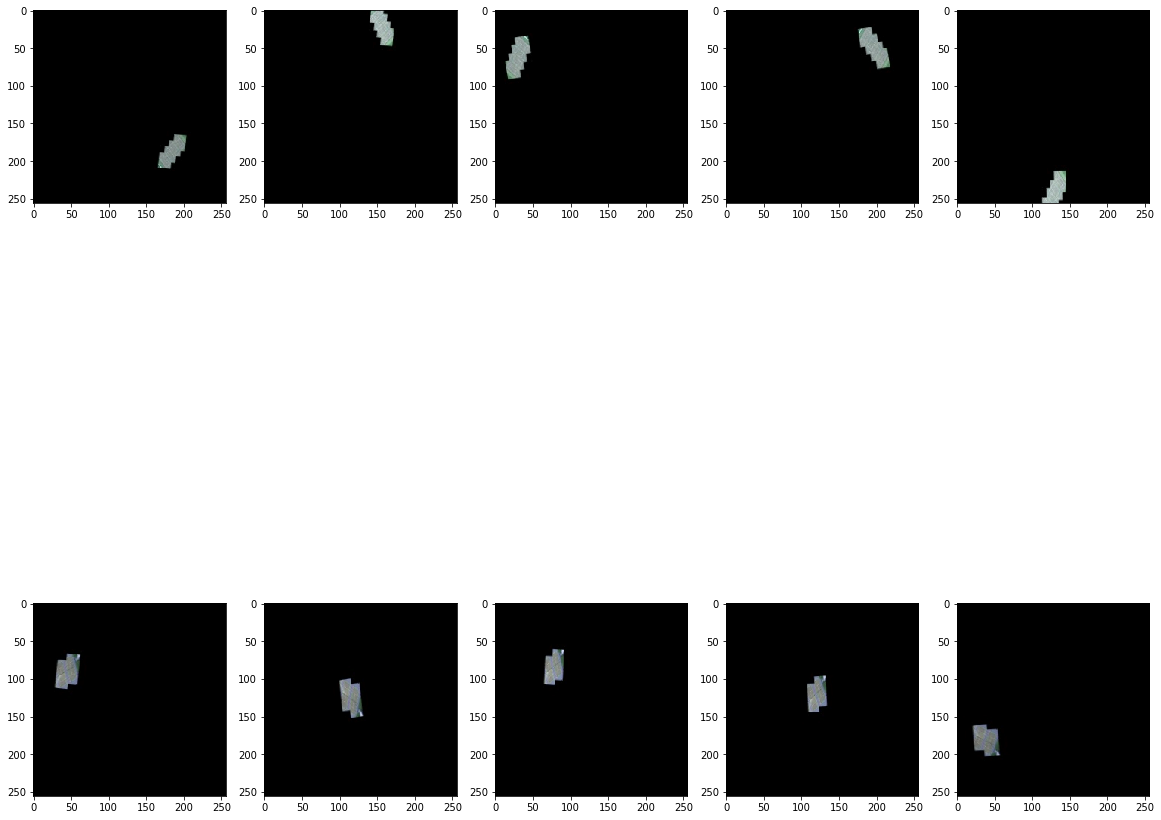

In [175]:
f, axarr = plt.subplots(2,5, figsize=(20,20))
axarr[0,0].imshow(aug_images_5[0])
axarr[0,1].imshow(aug_images_5[1])
axarr[0,2].imshow(aug_images_5[2])
axarr[0,3].imshow(aug_images_5[3])
axarr[0,4].imshow(aug_images_5[4])
axarr[1,0].imshow(aug_images_5[5])
axarr[1,1].imshow(aug_images_5[6])
axarr[1,2].imshow(aug_images_5[7])
axarr[1,3].imshow(aug_images_5[8])
axarr[1,4].imshow(aug_images_5[9])

In [221]:
# Randomising the images to increase efficiency of the model
import random
random.shuffle(final_list)

In [220]:
print("The total number of images after augmentation:",len(final_list))

The total number of images after augmentation: 440


In [222]:
# Separating the features and the labels
X = []
y = []
for features, label in final_list:
    X.append(features)
    y.append(label)

allDone()

In [223]:
len(X)

440

In [182]:
X

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]), array([[[0., 0., 0.],
         [0., 0., 0.],
         [

In [183]:
## Try joining two arrays

In [224]:
X = np.array(X).reshape(-1, 256, 256, 3)

In [186]:
X

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [225]:
from keras.utils import to_categorical
y_binary = to_categorical(y)

In [226]:
y_binary

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [189]:
y

[0,
 0,
 4,
 4,
 4,
 0,
 3,
 3,
 0,
 4,
 4,
 1,
 1,
 0,
 3,
 1,
 1,
 3,
 0,
 4,
 1,
 3,
 3,
 1,
 2,
 3,
 0,
 2,
 1,
 3,
 1,
 1,
 3,
 1,
 4,
 4,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 3,
 0,
 0,
 1,
 2,
 4,
 4,
 3,
 1,
 1,
 0,
 4,
 0,
 0,
 4,
 3,
 4,
 1,
 3,
 1,
 1,
 0,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 0,
 4,
 0,
 2,
 4,
 3,
 3,
 1,
 4,
 1,
 1,
 3,
 1,
 2,
 4,
 1,
 3,
 2,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 3,
 3,
 2,
 3,
 0,
 1,
 3,
 1,
 3,
 3,
 2,
 1,
 0,
 3,
 1,
 4,
 1,
 0,
 3,
 4,
 0,
 4,
 1,
 0,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 3,
 4,
 3,
 3,
 1,
 1,
 0,
 4,
 1,
 0,
 2,
 1,
 0,
 2,
 4,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 4,
 4,
 1,
 1,
 0,
 2,
 0,
 4,
 2,
 1,
 1,
 2,
 3,
 0,
 4,
 4,
 2,
 3,
 2,
 3,
 1,
 4,
 1,
 0,
 4,
 4,
 4,
 0,
 1,
 3,
 2,
 2,
 4,
 3,
 1,
 1,
 4,
 2,
 3,
 4,
 2,
 1,
 2,
 1,
 4,
 4,
 2,
 3,
 2,
 2,
 3,
 4,
 2,
 3,
 4,
 1,
 0,
 4,
 4,
 1,
 3,
 0,
 3,
 1,
 0,
 2,
 3,
 1,
 0,
 4,
 2,
 1,
 0,
 1,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 4,
 0,
 1,
 4,
 2,
 0,
 3,
 4,
 0,
 1,
 1,
 3,
 2,
 1,
 0,
 1,
 0,
 4,


In [227]:
y_binary.shape

(440, 3)

In [228]:
X.shape

(440, 256, 256, 3)

# Split the model in to training and testing set

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3)

# Building the Model

In [230]:
from keras import models
from keras import layers
from keras.layers import Dropout


from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2


from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

allDone()

In [232]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (256,256,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
# model.add(Dropout(0.5))
model.add(layers.Dense(3, activation = 'softmax'))
allDone()

In [233]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [234]:
model.fit(X_train, y_train, epochs =6, batch_size=32)
allDone()

Epoch 1/6
308/308 [==============================] - ETA: 28s - loss: 1.0953 - accuracy: 0.406 - ETA: 22s - loss: 3.6872 - accuracy: 0.390 - ETA: 18s - loss: 2.7685 - accuracy: 0.427 - ETA: 15s - loss: 2.3711 - accuracy: 0.390 - ETA: 12s - loss: 2.1259 - accuracy: 0.425 - ETA: 10s - loss: 1.9423 - accuracy: 0.421 - ETA: 7s - loss: 1.8082 - accuracy: 0.459 - ETA: 4s - loss: 1.6997 - accuracy: 0.48 - ETA: 1s - loss: 1.6311 - accuracy: 0.49 - 30s 97ms/step - loss: 1.5924 - accuracy: 0.4935
Epoch 2/6
308/308 [==============================] - ETA: 28s - loss: 0.8700 - accuracy: 0.625 - ETA: 25s - loss: 0.8323 - accuracy: 0.656 - ETA: 22s - loss: 0.8375 - accuracy: 0.635 - ETA: 19s - loss: 0.8326 - accuracy: 0.664 - ETA: 16s - loss: 0.8309 - accuracy: 0.650 - ETA: 12s - loss: 0.7976 - accuracy: 0.666 - ETA: 8s - loss: 0.7953 - accuracy: 0.669 - ETA: 5s - loss: 0.7923 - accuracy: 0.66 - ETA: 2s - loss: 0.7906 - accuracy: 0.66 - 33s 107ms/step - loss: 0.7793 - accuracy: 0.6721
Epoch 3/6
308/3

In [235]:
print('The number of test images:',len(y_test))

The number of test images: 132


## Evaluating test set

In [236]:
test_loss, test_acc = model.evaluate(X_test, y_test)

132/132 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - 4s 27ms/step


In [237]:
print('Test accuracy:',test_acc)

Test accuracy: 0.5454545617103577


In [238]:
print('Test loss:',test_loss)

Test loss: 2.2115029204975474


In [116]:
# store the predictions into a variable
ypred = model.predict_classes(X_test)

In [117]:
ypred

array([1, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 1,
       1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1,
       1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1],
      dtype=int64)

In [118]:
ypred.shape

(132,)

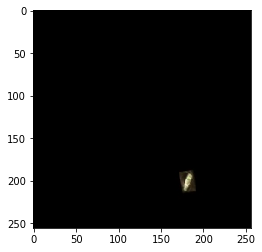

In [119]:
sample_test = X_test[0]
plt.imshow(sample_test)

In [120]:
# Reversing the one hot encoding
y_classes = [np.argmax(y, axis=None, out=None) for y in y_test]
y_classes

[1,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 1]

## Classification Report

In [103]:
from sklearn import metrics
print(metrics.classification_report(ypred, y_classes))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62        61
           1       0.88      0.69      0.77        54
           2       0.28      0.65      0.39        17

   micro avg       0.63      0.63      0.63       132
   macro avg       0.62      0.64      0.60       132
weighted avg       0.71      0.63      0.65       132



## Defining a function to generate predictions and accuracy of those predictions

In [253]:
def predictor(image_path):
    im = Image.open(image_path)
#     plt.imshow(im)
#     im = im.convert('RGB')
    im = im.resize((256,256), Image.ANTIALIAS)
    plt.imshow(im)
    pix_val = list(im.getdata())
    np_pix = np.asarray(pix_val)
    np_pix = np_pix/255
    np_pix = np_pix.reshape((1, 256,256,3))
    a = model.predict_classes(np_pix)
    b = model.predict_proba(np_pix)
    print("a:",a)
    print("b:",b)
    print(b[0][0])
    airplane_prob_list = np.ndarray.tolist(b)
    airplane_prob = airplane_prob_list[0][0]
#     np.set_printoptions(suppress=True)
    if int(b[0][0]) == 1.0:
        print("Airplane")
    elif int(b[0][1]) == 1.0:
        print("Ship")
    elif int(b[0][2]) == 1.0:
        print("Storage Tank")

a: [0]
b: [[1. 0. 0.]]
1.0
Airplane


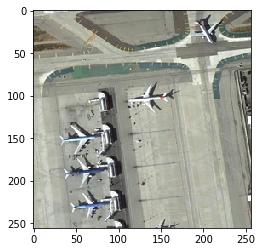

In [254]:
predictor(os.path.join(Path(r'D:\CS\BYTE\STATS\ML\01 Projects\Airport detection\NWPU VHR-10 dataset\positive image set\Airplane'), 
                       '018.jpg'))

a: [0]
b: [[1. 0. 0.]]
1.0
Airplane


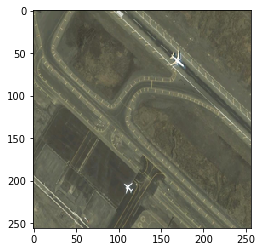

In [255]:
predictor(os.path.join(Path(r'C:\Users\Lenovo\Object Detection\Airplane'), 
                       '005.jpg'))

a: [0]
b: [[0.9908308  0.00000009 0.00916915]]
0.9908307790756226
0.9908307790756226
Airplane


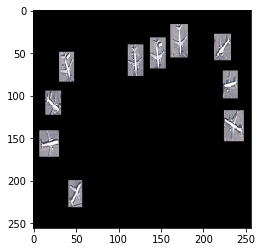

In [88]:
predictor(os.path.join(Path(r'C:\Users\Lenovo\Object Detection\extra\1'), 
                       'img_masked_1_39.jpg'))

a: [0]
b: [[1. 0. 0.]]
1.0
Airplane


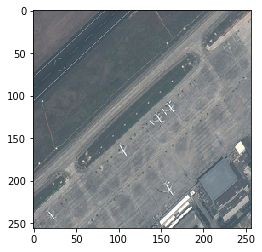

In [257]:
predictor(os.path.join(Path(r'C:\Users\Lenovo\Object Detection\Airplane'), 
                       '023.jpg'))

In [ ]:
model.predict_classes

In [ ]:
https://www.youtube.com/watch?v=wh7_etX91ls

pathtxt = os.path.join(r"C:\Users\Lenovo\Object Detection", "ground truth")
txt_list = []
for i in os.listdir(pathtxt):
    txtfile_full_path = os.path.join(pathtxt, i)
    with open(txtfile_full_path) as f:
            txt_list.append(f.read())

list_index_object = []
count = 0 
final_images = []
for img in os.listdir(pathp):
    a = cv2.imread(os.path.join(pathp,img))
    height,width,depth = a.shape
    u = txt_list[count].split(" \n")
    list_co = []
    p = re.compile('\d+')
    for i in range(len(u)):
        if p.findall(u[i]) != []:
            list_co.append(p.findall(u[i]))
            list_index_object.append(list_co[i][4])
        
    
#     print(list_co)
    
    
    rect_img = np.zeros((height,width), np.uint8)
    # cv.rectangle(img = rect_img, pt1 = (a1,a2), pt2 = (b1,b2), color = (255, 255, 255), thickness = -1)
    # cv.rectangle(img = rect_img, pt1 = (int(list_co[1][0]),int(list_co[1][1])), pt2 = (int(list_co[1][2]),int(list_co[1][3])), color = (255, 255, 255), thickness = -1) # testing with a 2nd mask
    for i in range(len(list_co)):
        cv.rectangle(img = rect_img, pt1 = (int(list_co[i][0]),int(list_co[i][1])), pt2 = (int(list_co[i][2]),int(list_co[i][3])), color = (255, 255, 255), thickness = -1)
    masked_data = cv.bitwise_and(a, a, mask=rect_img)
    dim = (256,256)
    resized = cv2.resize(masked_data, dim, interpolation = cv2.INTER_AREA)
#     plt.imshow(resized)
#     cv2.imwrite("img_masked{}.jpg".format(count), resized)
    final_images.append(resized)
    count += 1
#         plt.imshow(img_array)    # Shows all images, dont run
#         plt.show()
allDone()